# Plot data from mnist experiments

In [434]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()
sns.set_style("whitegrid")

IMAGEDIR = "./images/paper_last_minute"
DRYRUN = False

SAVEOLD = False
if os.path.isdir(IMAGEDIR) and SAVEOLD:
    current_time = datetime.now().strftime('%Y%m%d%H%M')
    os.rename(IMAGEDIR, f"{IMAGEDIR}_{current_time}")
os.makedirs(IMAGEDIR, exist_ok=True)

def _generate_filepath(name):
    filepath = os.path.join(IMAGEDIR, name)
    print(f"Saving file at: {filepath}")
    if os.path.exists(filepath):
        print(f"Warning: Overwriting existing file: {filepath}")
    return filepath

def savefig_fn(fig, name):
    filepath = _generate_filepath(name)
    if not DRYRUN:
        fig.savefig(filepath, bbox_inches="tight")
    else:
        print("DRY RUN, figure not saved.")
    return

def savestring_fn(string, name):
    filepath = _generate_filepath(name)
    if not DRYRUN:
        with open(filepath, 'w') as outfile:
            outfile.write(string)
    return



In [387]:

# Function to read JSON files and create a DataFrame
def process_files(directory):
    data = []
    other_rec = None
    epoch_cols = ["lfe", "energy", "hatlambda", "test_error", "train_error", "func_var", "lfe_chain_std"]
    filelist = [file for file in os.listdir(directory) if file.endswith("_result.json")]
    num_repetition = len(filelist)
    for file in filelist:
        with open(os.path.join(directory, file), "r") as f:
            result = json.load(f)        

        if other_rec is None:
            other_rec = {}
            for key in result.keys():
                if key not in ["rngseed"] + epoch_cols + ["hatlambda_lower", "hatlambda_upper"]:
                    other_rec[key] = result[key]

        # Create one dictionary per epoch and append to the data list
        for epoch in range(result["num_epoch"]):
            epoch_data = {
                "epoch": epoch,
                "rngseed": result["rngseed"],
            }
            for col in set(epoch_cols).intersection(set(result.keys())):
                epoch_data[col] = result[col][epoch]
            data.append(epoch_data)
    df = pd.DataFrame(data)
    if "func_var" in df.columns:
        n = other_rec["n_train"]
        df["nu"] = df["func_var"] / 2 * np.log(n) # itemp = 1 / log n
    return df, other_rec, num_repetition

# Function to plot time series with variation using fill_between
def plot_time_series(ax, df, column_name, legend_font_size="x-small", colname_change=None, ylabel=None, style=".--", markersize=None):
    mean = df.groupby("epoch")[column_name].mean()
    std_dev = df.groupby("epoch")[column_name].std()
    min_value = df.groupby("epoch")[column_name].min()
    max_value = df.groupby("epoch")[column_name].max()

    ax.plot(mean, style, label=f"Mean {colname_change}", markersize=markersize)
    ax.fill_between(mean.index, mean - std_dev, mean + std_dev, alpha=0.3, label=f"std {colname_change}")
    # ax.fill_between(mean.index, min_value, max_value, alpha=0.1, label=f"Range {column_name}")
    
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    ax.set_xlabel("epoch")
    ax.legend(fontsize=legend_font_size)



EPOCH_CUTTOFF = 1
# dir1 = "../entropy_sgd/eSGD/spartan_outputs/expt20230811_60000_512_t250_lr0.01_SGLDITER100_GAMMA100_sgd/"
# dir2 = "../entropy_sgd/eSGD/spartan_outputs/expt20230811_60000_512_t250_lr0.01_SGLDITER100_GAMMA100_entropy-sgd/"


# dir1 = "../entropy_sgd/eSGD/spartan_outputs/expt20230813_60000_512_t200_lr0.01_SGLDITER250_GAMMA100_sgd"
dir1 = "../entropy_sgd/eSGD/spartan_outputs/expt20230814_60000_512_t200_lr0.01_SGLDITER400_GAMMA100_sgd"
assert dir1.split("_")[-1] == "sgd"

# dir2 = "../entropy_sgd/eSGD/spartan_outputs/expt20230813_60000_512_t200_lr0.01_SGLDITER250_GAMMA100_entropy-sgd"
dir2 = "../entropy_sgd/eSGD/spartan_outputs/expt20230814_60000_512_t200_lr0.01_SGLDITER400_GAMMA100_entropy-sgd"
assert dir2.split("_")[-1] in ["entropy-sgd", "esgd"]

df_result1, other_rec1, num_repeat1 = process_files(dir1)
df_result2, other_rec2, num_repeat2 = process_files(dir2)
print(num_repeat1, num_repeat2)
df_result1

80 80


,epoch,rngseed,energy,lfe,hatlambda,train_error,func_var,test_error,lfe_chain_std,nu
0,0,505,18049.637221,22727.224543,425.154051,0.088133,23011.897336,0.0828,63.899139,1.265896e+05
1,1,505,13689.753198,20570.990339,625.447618,0.065517,22260.977114,0.0641,262.180809,1.224587e+05
2,2,505,10782.406916,18816.622321,730.243819,0.051583,23312.388349,0.0538,114.601868,1.282426e+05
3,3,505,8894.435518,17514.537082,783.496032,0.042317,22828.155999,0.0446,345.421808,1.255788e+05
4,4,505,7436.097089,16323.691787,807.808948,0.035167,22946.913183,0.0387,276.263168,1.262321e+05
...,...,...,...,...,...,...,...,...,...,...
15995,195,207,18.641342,11941.340795,1083.674901,0.000000,227562.941336,0.0170,933.480829,1.251835e+06
15996,196,207,18.552080,11714.356876,1063.052050,0.000000,192437.826893,0.0171,1311.615168,1.058610e+06
15997,197,207,18.369882,10663.489190,967.553418,0.000000,163969.547388,0.0172,1460.996480,9.020047e+05
15998,198,207,18.238556,10489.427255,951.744562,0.000000,119768.168238,0.0172,557.478256,6.588507e+05


# Experiment description

In [356]:
rec = other_rec1

experiment_description = f"""
Experiment Details:
------------------
- Dataset: MNIST
  - Training samples: {rec['n_train']}
  - Testing samples: {rec['n_test']}

- Network: Multi-layer Perceptron (MLP)
  - Number of parameters: {rec['network_param_count']}
  - Hidden layer sizes: {', '.join(map(str, rec['layers']))}

- Training:
  - Optimizer: SGD and Entropy-SGD
  - Learning rate: {rec['lr']}
  - Number of epochs: {rec['num_epoch']}
  - Batch size: {rec['batch_size']}

- Stochastic Gradient Langevin Dynamics (SGLD) Parameters:
  - Gamma: {rec['sgld_gamma']}
  - Number of iterations: {rec['sgld_num_iter']}
  - Number of chains: {rec['sgld_num_chains']}
  - Noise standard deviation: {rec['sgld_noise_std']}

Num experiment repeats: {num_repeat1}
"""

experiment_prose = f"""
In this experiment, we trained a feedforward ReLU on the MNIST dataset. The dataset consists of {rec['n_train']} training samples and {rec['n_test']} testing samples. The network is designed with {len(rec['layers'])} hidden layers having sizes {list(rec['layers'])}, and it contains a total of {rec['network_param_count']} parameters. 

For training, we employed two different optimizers, SGD and EntropySGD, with learning rate of {rec['lr']} and batch size of {rec['batch_size']}. The network is trained for {rec['num_epoch']} epochs. The number of epoch is chosen so that the classification error rate on the training set for both optimizers falls to zero. 

The localizing prior scale parameter $\gamma$ is set to {rec['sgld_gamma']}
The hyperparameters used for SGLD approximate posterior sampling are as follow: $\epsilon$ is set to {rec['sgld_noise_std']} and each of four independent SGLD chains is run for {rec['sgld_num_iter']} iterations.

The experiments are repeated for {num_repeat1} RNG seeds. 
"""

# experiment_prose = f"""
# In this experiment, we trained a Multi-layer Perceptron (MLP) on the MNIST dataset. The dataset consists of {rec['n_train']} training samples and {rec['n_test']} testing samples. The MLP network is designed with {len(rec['layers'])} hidden layers having sizes {list(rec['layers'])}, and it contains a total of {rec['network_param_count']} parameters. 

# For training, we employed two different optimizers, SGD and EntropySGD, with learning rate of {rec['lr']} and batch size of {rec['batch_size']}. The network is trained for {rec['num_epoch']} epochs. The number of epoch is chosen so that the classification error rate on the training set for both optimizers falls to zero. 

# The hyperparameters used for SGLD approximate posterior sampling are as follow. The localising prior concentration parameter $\\gamma$ is set to {rec['sgld_gamma']} and its step size $\\epsilon$ is set to {rec['sgld_noise_std']}. Each SGLD chain is run for {rec['sgld_num_iter']} iterations, which is repeated over {rec['sgld_num_chains']} independent chains. 

# The experiments are repeated for {num_repeat1} RNG seeds. 
# """

print(experiment_prose)
savestring_fn(experiment_prose, "mnist_expt_description_prose.tex")

print(experiment_description)
savestring_fn(experiment_description, "mnist_expt_description_points.tex")



In this experiment, we trained a feedforward ReLU on the MNIST dataset. The dataset consists of 60000 training samples and 10000 testing samples. The network is designed with 2 hidden layers having sizes [1024, 1024], and it contains a total of 1863690 parameters. 

For training, we employed two different optimizers, SGD and EntropySGD, with learning rate of 0.01 and batch size of 512. The network is trained for 200 epochs. The number of epoch is chosen so that the classification error rate on the training set for both optimizers falls to zero. 

The localizing prior scale parameter $\gamma$ is set to 100.0
The hyperparameters used for SGLD approximate posterior sampling are as follow: $\epsilon$ is set to 1e-05 and each of four independent SGLD chains is run for 400 iterations.

The experiments are repeated for 80 RNG seeds. 

Saving file at: ./images/paper_last_minute/mnist_expt_description_prose.tex

Experiment Details:
------------------
- Dataset: MNIST
  - Training samples: 6000

# Plot data from Spartan

Saving file at: ./images/paper_last_minute/combined_lambdahat_timeseries.png


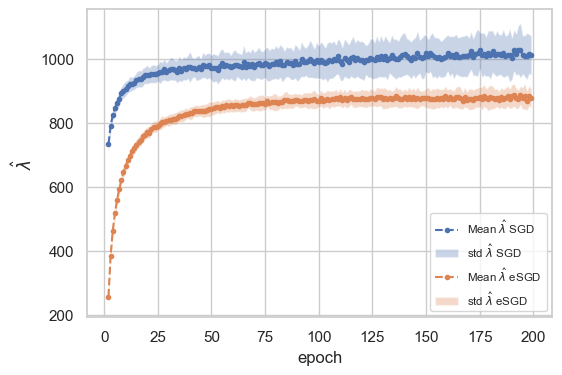

In [357]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ylabel = "$\hat{\lambda}$"
df = df_result1
df = df[df["epoch"] > EPOCH_CUTTOFF]
plot_time_series(ax, df, column_name="hatlambda", colname_change="$\hat{\lambda}$ SGD", ylabel=ylabel)

df = df_result2
df = df[df["epoch"] > EPOCH_CUTTOFF]
plot_time_series(ax, df, column_name="hatlambda", colname_change="$\hat{\lambda}$ eSGD", ylabel=ylabel)

savefig_fn(fig, "combined_lambdahat_timeseries.png")

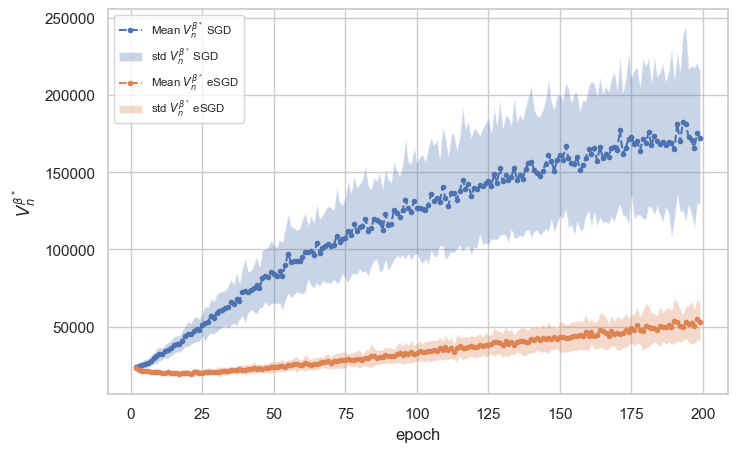

In [358]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
varname = "func_var"
ylabel = "$V_n^{\\beta^*}$"

df = df_result1
df = df[df["epoch"] > EPOCH_CUTTOFF]
plot_time_series(ax, df, column_name=varname, colname_change=f"{ylabel} SGD", ylabel=ylabel)

df = df_result2
df = df[df["epoch"] > EPOCH_CUTTOFF]
plot_time_series(ax, df, column_name=varname, colname_change=f"{ylabel} eSGD", ylabel=ylabel)


Saving file at: ./images/paper_last_minute/combined_funcvar_timeseries.png


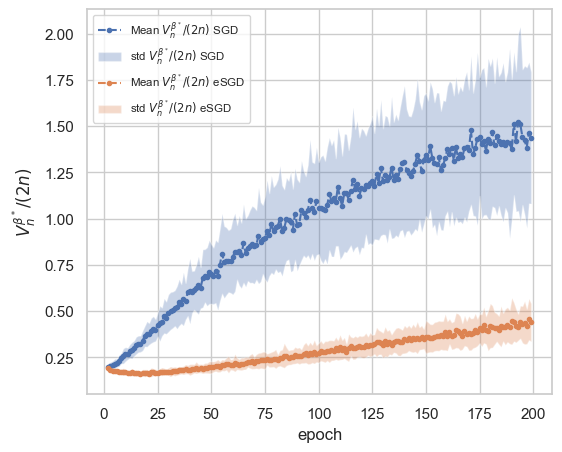

In [359]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
varname = "$V_n^{\\beta^*}/(2n)$"
n = other_rec1["n_train"]
ylabel = varname

df = df_result1.copy(deep=True)
df = df[df["epoch"] > EPOCH_CUTTOFF]
df[varname] = df["func_var"] / (2 * n)
plot_time_series(ax, df, column_name=varname, colname_change=f"{ylabel} SGD", ylabel=ylabel)

df = df_result2.copy(deep=True)
df = df[df["epoch"] > EPOCH_CUTTOFF]
df[varname] = df["func_var"] / (2 * n)
plot_time_series(ax, df, column_name=varname, colname_change=f"{ylabel} eSGD", ylabel=ylabel)

savefig_fn(fig, "combined_funcvar_timeseries.png")

Saving file at: ./images/paper_last_minute/combined_funcvar_histogram.png


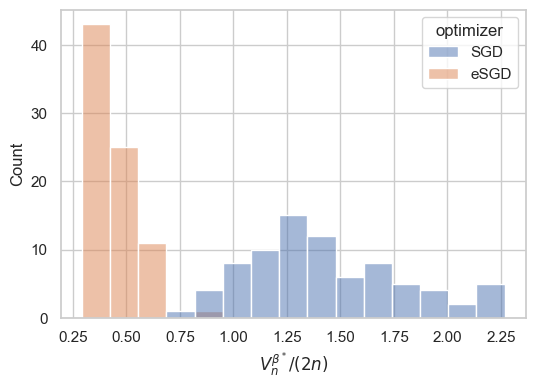

In [360]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
varname = "$V_n^{\\beta^*}/(2n)$"
n = other_rec1["n_train"]
xlabel = varname

dfs = []

df = df_result1.copy(deep=True)
df = df[df["epoch"] == df["epoch"].max()]
df[varname] = df["func_var"] / (2 * n)
df["optimizer"] = ["SGD" for _ in range(len(df))]
# ax.hist(df[varname], label=f"{xlabel} SGD", alpha=0.8)
dfs.append(df)

df = df_result2.copy(deep=True)
df = df[df["epoch"] == df["epoch"].max()]
df[varname] = df["func_var"] / (2 * n)
df["optimizer"] = ["eSGD" for _ in range(len(df))]
# ax.hist(df[varname], label=f"{xlabel} eSGD", alpha=0.8)
dfs.append(df)


df_concat = pd.concat(dfs, axis=0)
sns.histplot(data=df_concat, x=varname, hue="optimizer", hue_order=["SGD", "eSGD"], ax=ax, bins=15)
ax.yaxis.get_major_locator().set_params(integer=True)
savefig_fn(fig, "combined_funcvar_histogram.png")

Saving file at: ./images/paper_last_minute/combined_train_test_error_timeseries.png


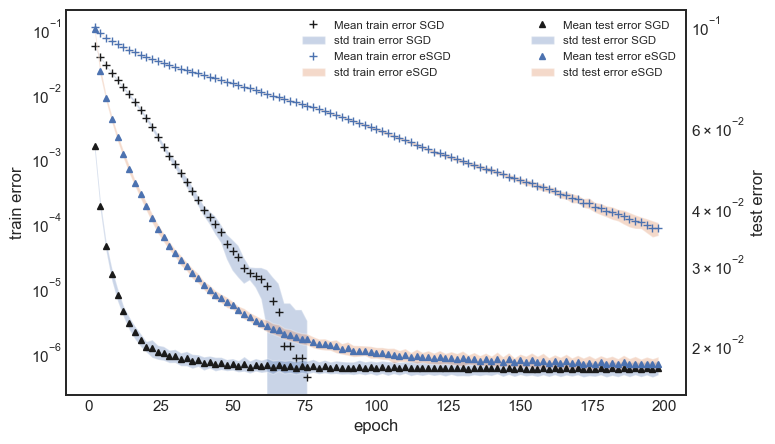

In [419]:
with plt.style.context('seaborn-v0_8-white'):
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    # ylabel = "error"
    thin = 4
    ax1 = ax
    ax2 = ax.twinx()

    df1 = df_result1.copy(deep=True)
    df1 = df1[df1["epoch"] > EPOCH_CUTTOFF].iloc[::thin]
    df2 = df_result2.copy(deep=True)
    df2 = df2[df2["epoch"] > EPOCH_CUTTOFF].iloc[::thin]

    plot_time_series(ax1, df1, column_name="train_error", colname_change="train error SGD", ylabel="train error", style="k+", markersize=None)
    plot_time_series(ax1, df2, column_name="train_error", colname_change="train error eSGD", ylabel="train error", style="b+", markersize=None)
    ax1.legend(loc="upper center", fontsize="x-small")
    ax1.set_yscale('log')

    plot_time_series(ax2, df1, column_name="test_error", colname_change="test error SGD", ylabel="test error", style="k^", markersize=4)
    plot_time_series(ax2, df2, column_name="test_error", colname_change="test error eSGD", ylabel="test error", style="b^", markersize=4)
    ax2.set_yscale('log')

    savefig_fn(fig, "combined_train_test_error_timeseries.png")

<Axes: >

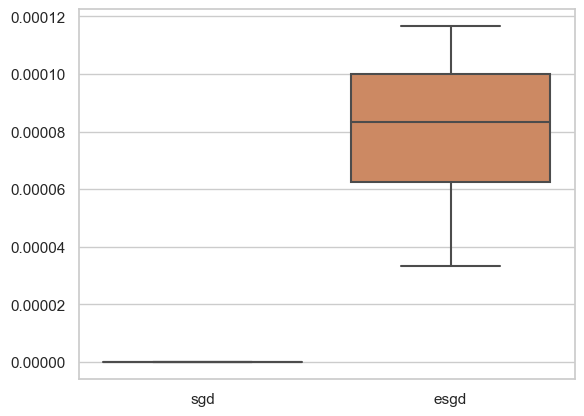

In [416]:
key = "train_error"
df = df_result1
a = df[df["epoch"] == df["epoch"].max()][key]
df = df_result2
b = df[df["epoch"] == df["epoch"].max()][key]


dfx = pd.DataFrame({"sgd": a, "esgd": b})
sns.boxplot(data=dfx)


Saving file at: ./images/paper/combined_lambdahat_histogram.png


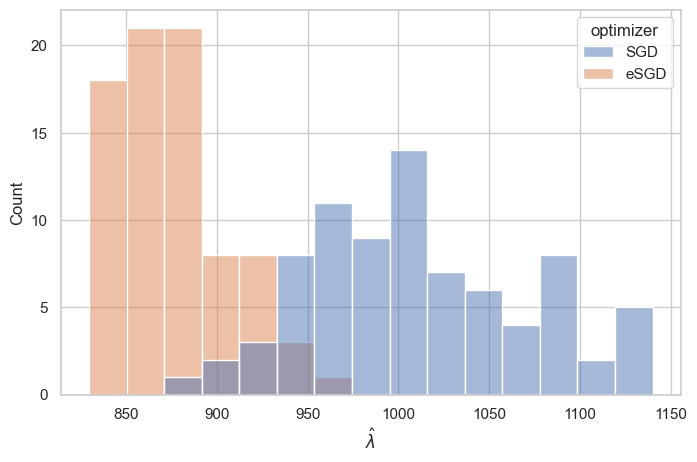

In [347]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
varname = "$\hat{\lambda}$"
n = other_rec1["n_train"]
xlabel = varname

dfs = []

df = df_result1.copy(deep=True)
df = df[df['epoch'] == df['epoch'].max()]
df[varname] = df["hatlambda"]
df["optimizer"] = ["SGD" for _ in range(len(df))]
dfs.append(df)

df = df_result2.copy(deep=True)
df = df[df['epoch'] == df['epoch'].max()]
df[varname] = df["hatlambda"]
df["optimizer"] = ["eSGD" for _ in range(len(df))]
dfs.append(df)


df_concat = pd.concat(dfs, axis=0)
sns.histplot(data=df_concat, x=varname, hue="optimizer", hue_order=["SGD", "eSGD"], ax=ax, bins=15)
ax.yaxis.get_major_locator().set_params(integer=True)
savefig_fn(fig, "combined_lambdahat_histogram.png")

Saving file at: ./images/paper/combined_lambdahat_histogram.png


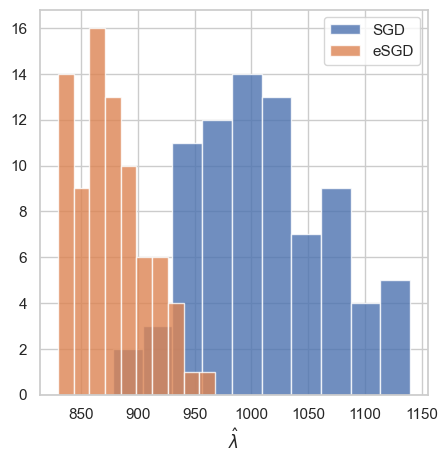

In [324]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df = df_result1
df = df[df['epoch'] == df['epoch'].max()]
ax.hist(df['hatlambda'], alpha=0.8, label="SGD")

df = df_result2
df = df[df['epoch'] == df['epoch'].max()]
ax.hist(df['hatlambda'], alpha=0.8, label="eSGD")


ax.set_xlabel("$\hat{\lambda}$");
ax.legend()

savefig_fn(fig, "combined_lambdahat_histogram.png")


# Last epoch experiments recorded in MongoDB

In [447]:
from pymongo import MongoClient
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ROTATION = 90
# Connect to the MongoDB server
client = MongoClient('localhost', 27017)  
db = client['mnist_local_coeff_expt']  
collection = db['runs'] 
projection = {
    "model_path": "$config.model_filepath",
    "lr": "$info.training_config.lr",
    "optim": "$info.training_config.optimizer",
    "batch_size": "$info.training_config.batch_size",
    "lambdahat": "$info.lambdahat", 
    "sgld_gamma": "$config.sgld_gamma", 
    "sgld_epsilon": "$config.sgld_noise_std", 
    "sgld_num_iter": "$config.sgld_num_iter",
    "sgld_num_chains": "$config.sgld_num_chains", 
    "test_loss": "$info.test_loss", 
    "train_loss": "$info.train_loss", 
    "test_error": "$info.test_error",
    "train_error": "$info.train_error", 
    "lfe_chain_std": "$info.lfe_chain_std", 
    "lfe": "$info.local_free_energy"
}
df = list(collection.find({"status": "COMPLETED", "config.seed": 49}, projection=projection))

# Convert to a pandas DataFrame
df = pd.DataFrame(df)
df.dropna(axis=0, how="any")
df = df.sort_values(
    ["sgld_gamma", "sgld_num_iter", "sgld_epsilon", "optim"],
    ascending=[1, 1, 1, 0]
    )
print(df.shape)
df.head()


(1080, 16)


,_id,model_path,lr,optim,batch_size,lambdahat,sgld_gamma,sgld_epsilon,sgld_num_iter,sgld_num_chains,test_loss,train_loss,test_error,train_error,lfe_chain_std,lfe
21,3954,./spartan_outputs/expt20230814_60000_512_t200_...,0.01,sgd,512,218.067368,10.0,0.00001,100,4,29.677826,0.004325,0.0176,0.000083,95.202870,2658.672815
41,3974,./spartan_outputs/expt20230814_60000_512_t200_...,0.01,sgd,512,210.642562,10.0,0.00001,100,4,30.162745,0.004197,0.0166,0.000100,68.202218,2569.340922
55,3988,./spartan_outputs/expt20230814_60000_512_t200_...,0.01,sgd,512,149.376953,10.0,0.00001,100,4,35.420067,0.000300,0.0174,0.000000,49.160747,1661.478870
91,4024,./spartan_outputs/expt20230814_60000_512_t200_...,0.01,sgd,512,144.901964,10.0,0.00001,100,4,37.903442,0.000299,0.0176,0.000000,35.564673,1612.190962
149,4082,./spartan_outputs/expt20230814_60000_512_t200_...,0.01,sgd,512,150.716260,10.0,0.00001,100,4,37.030312,0.000304,0.0173,0.000000,82.585489,1676.448967


Saving file at: ./images/paper_last_minute/lastepoch_lambdahat_boxplot.png


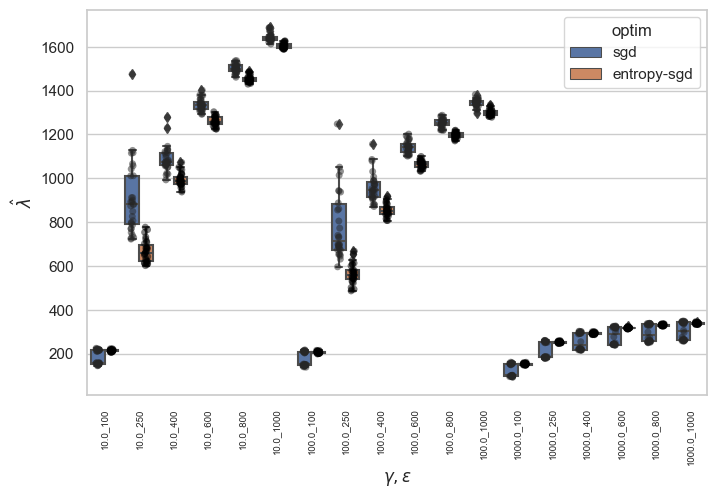

In [448]:
# Combine the three columns into one for the x-axis
key = '$\gamma, \epsilon$'
df[key] = df['sgld_gamma'].astype(str) + '_' + df['sgld_num_iter'].astype(str) #+ '_' + df['sgld_epsilon'].astype(str)
assert len(set(df["sgld_epsilon"])) == 1
# dfx = df[df["sgld_gamma"] > 500]
dfx = df
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(x=key, y='lambdahat', hue='optim', data=dfx, ax=ax)
sns.stripplot(x=key, y='lambdahat', hue='optim', data=dfx, dodge=True, ax=ax, palette="dark:black", alpha=0.5, legend=False)

ax.set_xticklabels(ax.get_xticklabels(), rotation=ROTATION, fontsize=7);
# ax.set_yscale('log');
ax.set_ylabel("$\hat{\lambda}$")

savefig_fn(fig, "lastepoch_lambdahat_boxplot.png")

Saving file at: ./images/paper_last_minute/lastepoch_testloss_vs_lambdahat_chainlen400_gamma100.0.png
Saving file at: ./images/paper_last_minute/lastepoch_testloss_vs_lambdahat_chainlen600_gamma100.0.png
Saving file at: ./images/paper_last_minute/lastepoch_testloss_vs_lambdahat_chainlen800_gamma100.0.png
Saving file at: ./images/paper_last_minute/lastepoch_testloss_vs_lambdahat_chainlen1000_gamma100.0.png


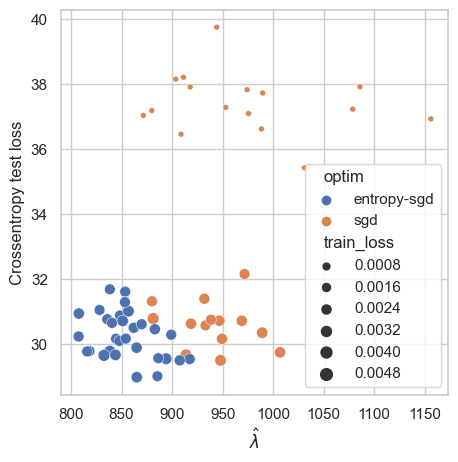

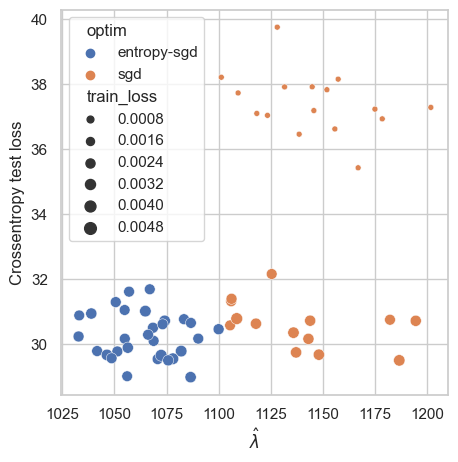

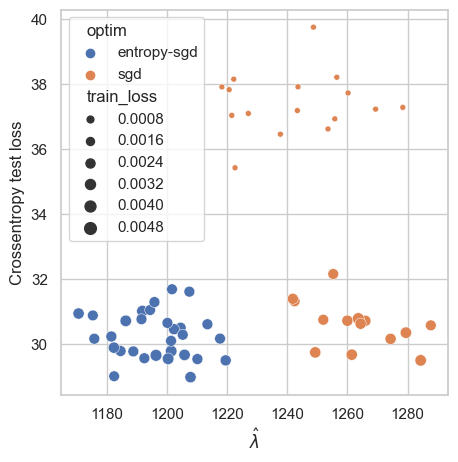

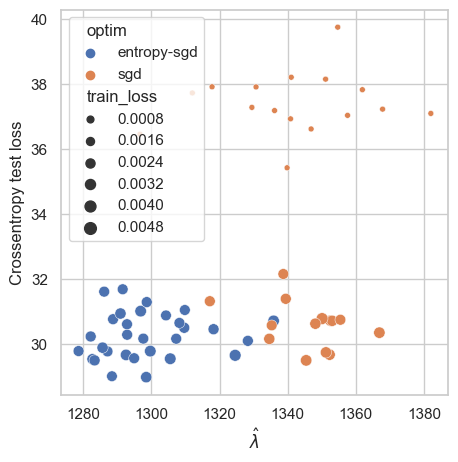

In [405]:
for chain_len, gamma in [(400, 100.0), (600, 100.0), (800, 100.0), (1000, 100.0)]:
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    dfx = df[ 
        (df["sgld_num_iter"] == chain_len)
        & (df["sgld_gamma"] == gamma)
    ]
    sns.scatterplot(data=dfx, x="lambdahat", y="test_loss", hue="optim", size="train_loss", ax=ax)
    ax.set_xlabel("$\hat{\lambda}$")
    ax.set_ylabel("Crossentropy test loss")

    savefig_fn(fig, f"lastepoch_testloss_vs_lambdahat_chainlen{chain_len}_gamma{gamma}.png")

Saving file at: ./images/paper_last_minute/lastepoch_train_test_error_loss_boxplots.png


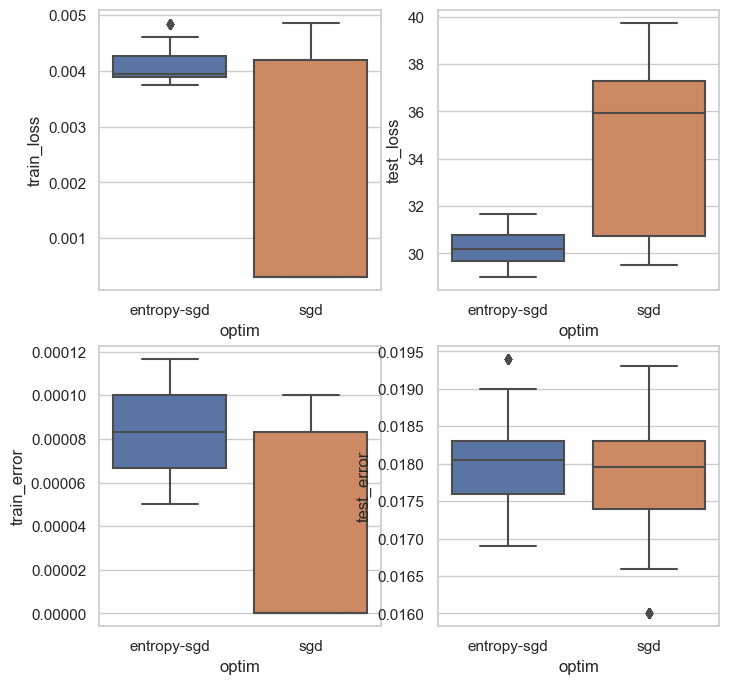

In [406]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = np.ravel(axes)
for i, name in enumerate(["train_loss", "test_loss", "train_error", "test_error"]):
    ax = axes[i]
    sns.boxplot(data=df, x="optim", y=name, ax=ax)
    # sns.stripplot(data=df, x="optim", y=name, dodge=True, ax=ax, palette="dark:black", alpha=0.5)

savefig_fn(fig, "lastepoch_train_test_error_loss_boxplots.png")

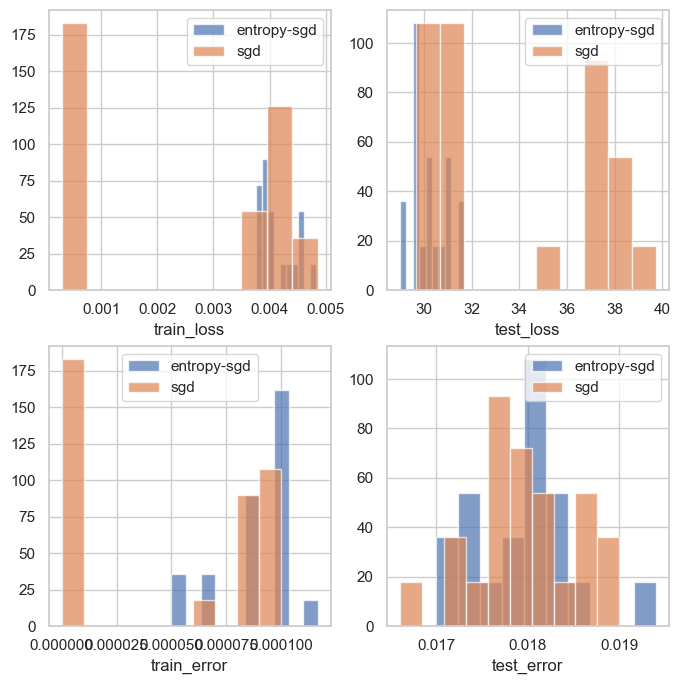

In [276]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = np.ravel(axes)
for i, name in enumerate(["train_loss", "test_loss", "train_error", "test_error"]):
    ax = axes[i]
    for optim in ["entropy-sgd", "sgd"]:
        ax.hist(df[df["optim"] == optim][name], label=optim, alpha=0.7)
    ax.set_xlabel(name)
    ax.legend()


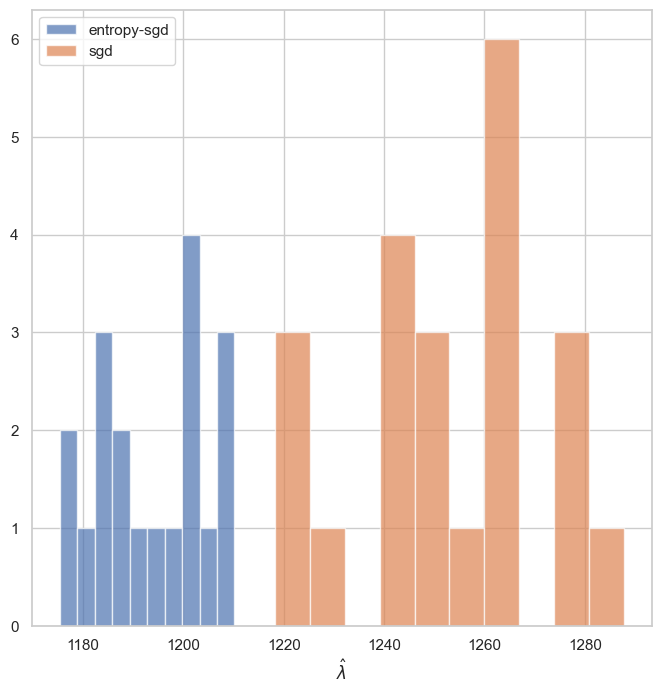

In [277]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dfx = df[
    (df["sgld_epsilon"] == 1e-5)
    & (df["sgld_gamma"] == 100.0)
    & (df["sgld_num_iter"] == 800)
]
for optim in ["entropy-sgd", "sgd"]:
    ax.hist(dfx[dfx["optim"] == optim]["lambdahat"], label=optim, alpha=0.7)
ax.set_xlabel("$\hat{\lambda}$")
ax.legend()

Saving file at: ./images/paper/lastepoch_lfe_std_to_mean_boxplots.png
DRY RUN, figure not saved.


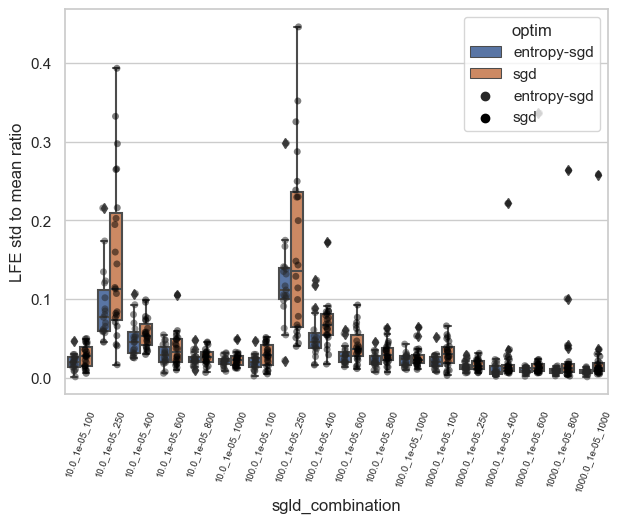

In [278]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
df["std_mean_ratio"] = df["lfe_chain_std"] / df["lfe"]
sns.boxplot(data=df, x="sgld_combination", y="std_mean_ratio", hue="optim", ax=ax)
sns.stripplot(x='sgld_combination', y='std_mean_ratio', hue='optim', data=df, dodge=True, ax=ax, palette="dark:black", alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=ROTATION, fontsize=7);
ax.set_ylabel("LFE std to mean ratio")
savefig_fn(fig, "lastepoch_lfe_std_to_mean_boxplots.png")

Saving file at: ./images/paper/lastepoch_lfe_std_boxplots.png
DRY RUN, figure not saved.


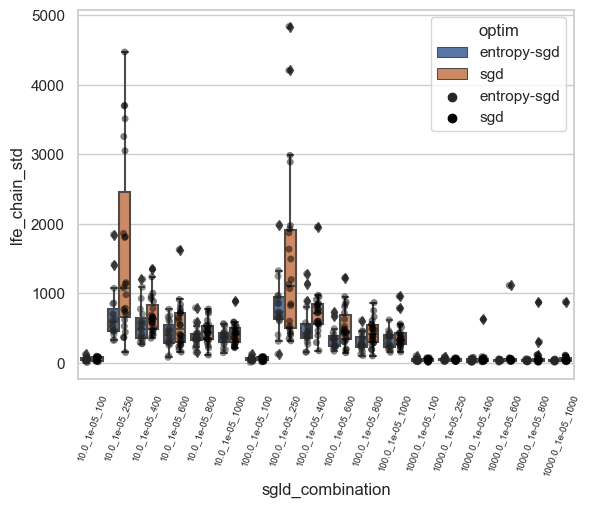

In [279]:
fig, ax = plt.subplots(1, 1)
df["std_mean_ratio"] = df["lfe_chain_std"] / df["lfe"]
sns.boxplot(data=df, x="sgld_combination", y="lfe_chain_std", hue="optim", ax=ax)
sns.stripplot(x='sgld_combination', y='lfe_chain_std', hue='optim', data=df, dodge=True, ax=ax, palette="dark:black", alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=ROTATION, fontsize=7);
savefig_fn(fig, "lastepoch_lfe_std_boxplots.png")


Saving file at: ./images/paper/lastepoch_lfe_boxplots.png
DRY RUN, figure not saved.


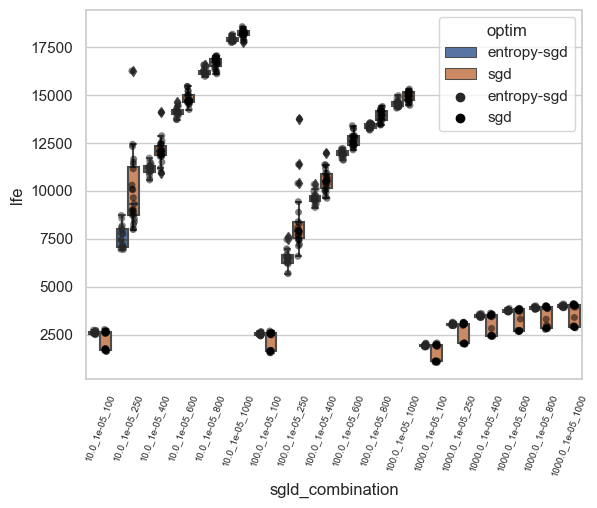

In [280]:
fig, ax = plt.subplots(1, 1)
sns.boxplot(data=df, x="sgld_combination", y="lfe", hue="optim", ax=ax)
sns.stripplot(x='sgld_combination', y='lfe', hue='optim', data=df, dodge=True, ax=ax, palette="dark:black", alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=ROTATION, fontsize=7);
savefig_fn(fig, "lastepoch_lfe_boxplots.png")